<a href="https://colab.research.google.com/github/mohmaed7777/Logistic-Regression-Analysis/blob/main/Logistic_Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 
import sklearn
print('Setup is completed!')

Setup is completed!


In [4]:
file_path = '/content/Iris.csv'
df = pd.read_csv(file_path)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.drop('Id', axis=1, inplace=True)

In [7]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [8]:
# Check the data are all Scled form -1 to the minimum and 1 to the maximum : 
df.iloc[:, :-1].min().value_counts()

0.1    1
4.3    1
1.0    1
2.0    1
dtype: int64

In [10]:
df.iloc[:, :-1].max().value_counts()

6.9    1
7.9    1
4.4    1
2.5    1
dtype: int64

In [11]:
# Examine the breakdown of target value are threy realtivily balanced or not : 
df.Species.value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [13]:
# label Incoding to the Y value: 
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()

In [15]:
df['Species'] = le.fit_transform(df.Species)

In [16]:
df['Species'].sample(5)

15     0
100    2
139    2
88     1
55     1
Name: Species, dtype: int64

In [18]:
# Calculate the correlation between the Independint variable: 
feature_cols = df.columns[:-1]
corr_values = df[feature_cols].corr()
corr_values

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [19]:
# Specifiy by emptying all data below the diagnoal : 
tril_index = np.tril_indices_from(corr_values)
tril_index

(array([0, 1, 1, 2, 2, 2, 3, 3, 3, 3]), array([0, 0, 1, 0, 1, 2, 0, 1, 2, 3]))

In [21]:
# Make the unused values as Nan's : 
corr_array = np.array(corr_values)
corr_array[np.tril_indices_from(corr_values)] = np.nan
pd.DataFrame(corr_array)

,0,1,2,3
0,NaN,-0.109369,0.871754,0.817954
1,NaN,NaN,-0.420516,-0.356544
2,NaN,NaN,NaN,0.962757
3,NaN,NaN,NaN,NaN


In [24]:
# Recreate correaltion pandas dataframe: 
corr_values = pd.DataFrame(corr_values, columns=corr_values.columns, index = corr_values.index)
corr_values

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [25]:
# Stack the data and convert it to a dataframe: 
corr_values = (corr_values.stack().to_frame().reset_index().rename(columns={'level_0':'feature_1',
                                                                            'level_1':'feature_2',
                                                                            0:'correlation'}))

In [26]:
# Get the absolute values for sorting : 
corr_values['abs_correlation'] = corr_values.correlation.abs()

0     1.000000
1     0.109369
2     0.871754
3     0.817954
4     0.109369
5     1.000000
6     0.420516
7     0.356544
8     0.871754
9     0.420516
10    1.000000
11    0.962757
12    0.817954
13    0.356544
14    0.962757
15    1.000000
Name: abs_correlation, dtype: float64

[Text(0, 0.5, 'Frequnciy'), Text(0.5, 0, 'Absolute corr')]

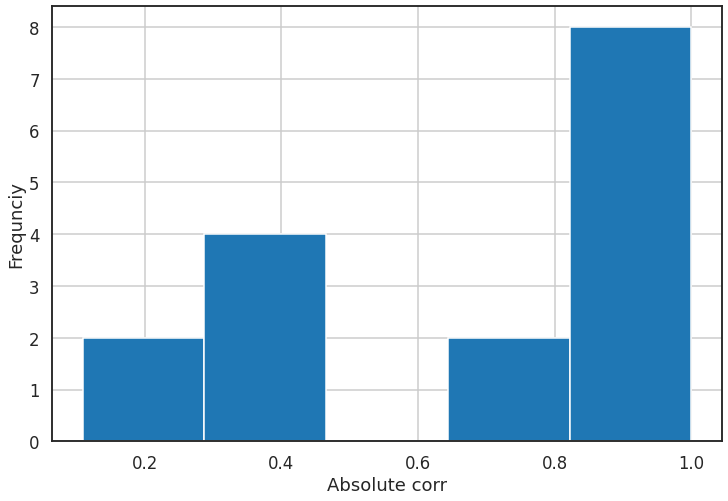

In [32]:
# Create a histogram for absolute correlation vlaues : 
sns.set_context('talk')
sns.set_style('white')
ax = corr_values.abs_correlation.hist(bins=5, figsize=(12, 8))
ax.set(xlabel='Absolute corr', ylabel='Frequnciy')